## **Create_Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd "/content/drive/MyDrive/Human_Detection/Dataset 02"

/content/drive/MyDrive/Human_Detection/Dataset 02


In [4]:
import zipfile
import os

# Create a directory for the dataset
os.makedirs('Human-Dataset', exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile('output_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('Human-Dataset')

KeyboardInterrupt: 

## **Train_Dataset**

In [ ]:
!pip install ultralytics

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
%pip install optuna

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
%cd "/content/drive/MyDrive/Human_Detection/Dataset 02"

/content/drive/MyDrive/Human_Detection/Dataset 02


In [ ]:
import optuna
from ultralytics import YOLO

def objective(trial):
    # Define hyperparameters
    params = {
        'lr0': trial.suggest_loguniform('lr0', 1e-5, 1e-1),
        'momentum': trial.suggest_uniform('momentum', 0.6, 0.98),
        'weight_decay': trial.suggest_loguniform('weight_decay', 1e-6, 1e-2),
        'warmup_epochs': trial.suggest_int('warmup_epochs', 1, 5),
        'box': trial.suggest_uniform('box', 0.02, 0.2),
        'cls': trial.suggest_uniform('cls', 0.2, 4.0),
        'kobj': trial.suggest_uniform('kobj', 0.2, 4.0),  # Corrected
        'hsv_h': trial.suggest_uniform('hsv_h', 0.0, 0.1),
        'hsv_s': trial.suggest_uniform('hsv_s', 0.0, 0.9),
        'hsv_v': trial.suggest_uniform('hsv_v', 0.0, 0.9),
        'degrees': trial.suggest_uniform('degrees', 0.0, 45.0),
        'translate': trial.suggest_uniform('translate', 0.0, 0.1),
        'scale': trial.suggest_uniform('scale', 0.5, 1.5),
        'shear': trial.suggest_uniform('shear', 0.0, 0.1),
        'fliplr': trial.suggest_uniform('fliplr', 0.0, 1.0)
    }

    model = YOLO('yolov8n.pt')  # or your specific model path


    # Train the YOLO model with the suggested hyperparameters
    results = model.train(
        data='/content/drive/MyDrive/Human_Detection/Dataset 02/dataset.yaml',
        epochs=20,
        batch=16,
        plots=True,
        imgsz=640,
        **params  # Pass parameters here
    )

    return results['metrics/mAP_0.5']

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


# Get the best hyperparameters
print(study.best_params)


[I 2024-07-18 04:21:54,366] A new study created in memory with name: no-name-cad2da99-5fba-4c28-90cb-b71bdedc85ac


Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Human_Detection/Dataset 02/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning /content/drive/MyDrive/Human_Detection/Dataset 02/Human-Dataset/output_dataset/labels/train.cache... 1026 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1026/1026 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Human_Detection/Dataset 02/Human-Dataset/output_dataset/labels/val.cache... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00028318394735930575' and 'momentum=0.9123769303880753' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00038007937062763613), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.94G    0.02218      8.533      1.826         30        640: 100%|██████████| 65/65 [00:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]


                   all        128       2308      0.471      0.315       0.31     0.0823


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7b841eeec1f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.66G     0.0183      5.855       1.57        652        640:  25%|██▍       | 16/65 [00:06<00:20,  2.41it/s]
[W 2024-07-18 04:23:36,740] Trial 0 failed with parameters: {'lr0': 0.00028318394735930575, 'momentum': 0.9123769303880753, 'weight_decay': 0.00038007937062763613, 'warmup_epochs': 5, 'box': 0.06826592692281486, 'cls': 2.071941641326329, 'kobj': 1.0359704011194062, 'hsv_h': 0.05776803389605378, 'hsv_s': 0.21882273835420307, 'hsv_v': 0.22835091118726542, 'degrees': 33.17902530384982, 'translate': 0.04020721461750715, 'scale': 0.8802153198084787, 'shear': 0.04796506550818574, 'fliplr': 0.4893128232128664} because of the following error: RuntimeError('DataLoader worker (pid(s) 19145, 19148, 19149, 19150, 19151, 19152, 19157, 19158) exited unexpectedly').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1133, in _try_get_data
    data = self._data_queue.get(timeout=timeout)
  File "/usr/lib/pyt

RuntimeError: DataLoader worker (pid(s) 19145, 19148, 19149, 19150, 19151, 19152, 19157, 19158) exited unexpectedly

In [ ]:
from IPython.display import Image

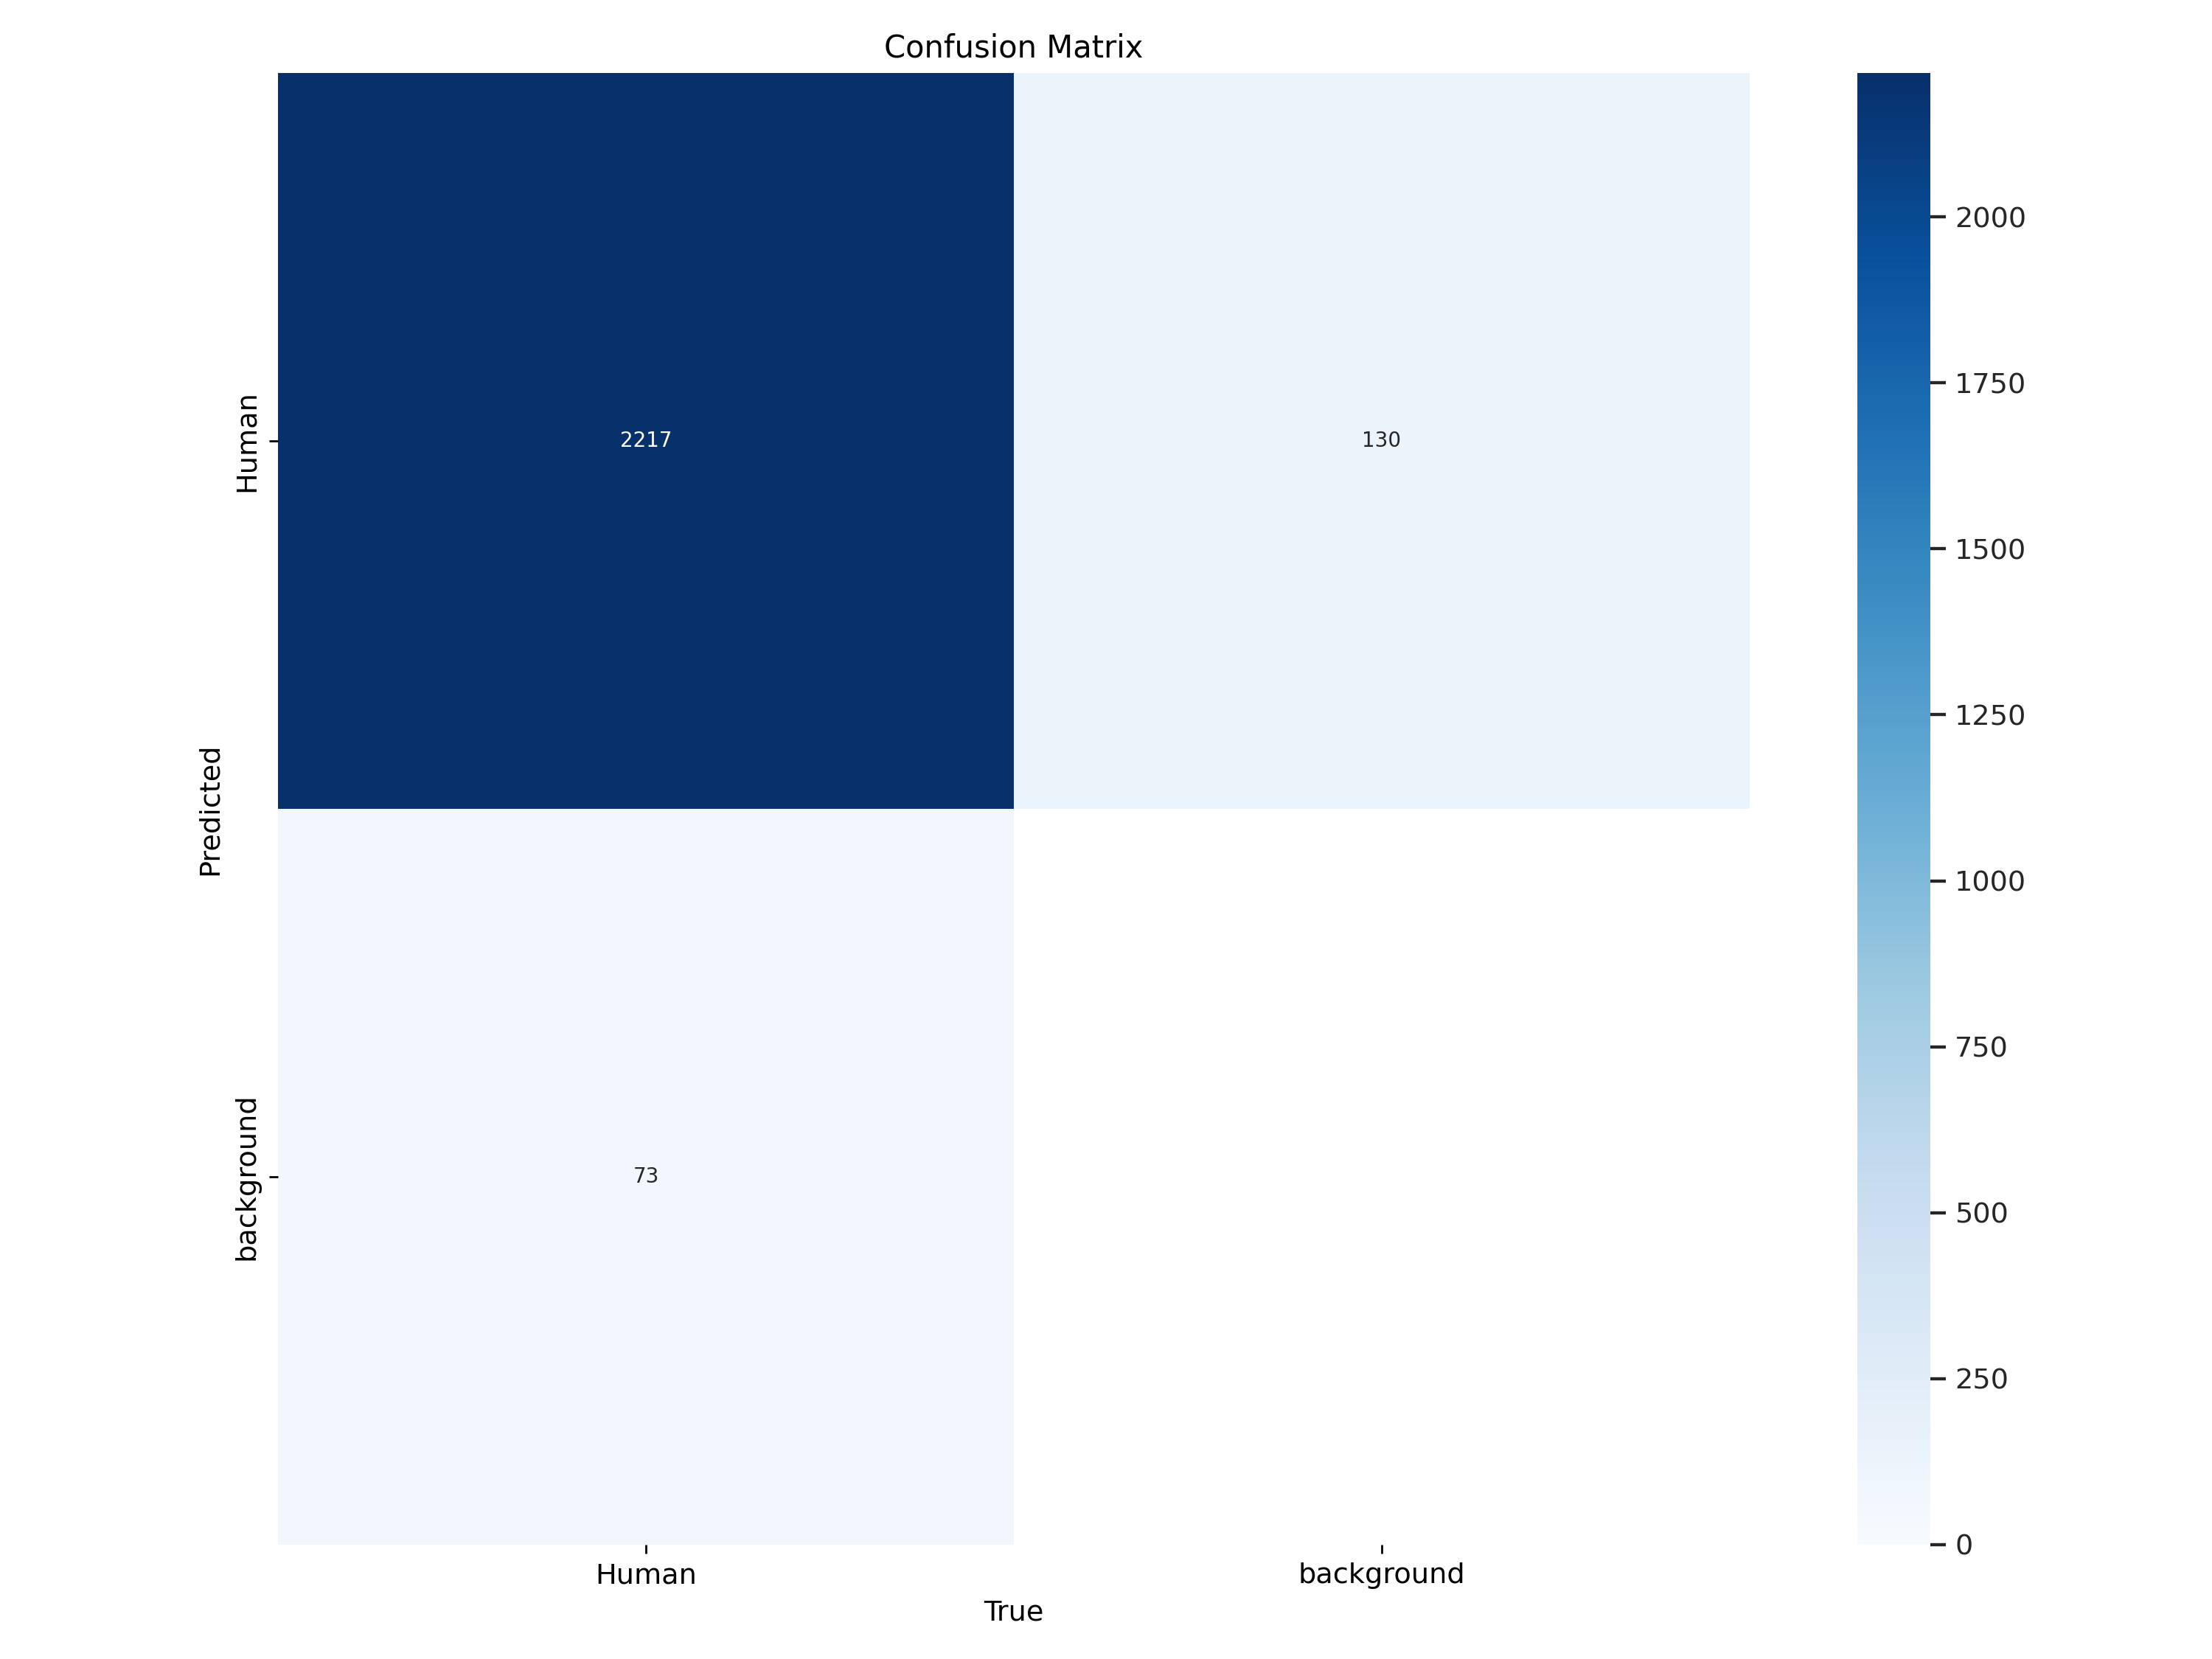

In [ ]:
Image(filename='/content/drive/MyDrive/Human_Detection/Dataset 02/runs/detect/train2/confusion_matrix.png', width=600)

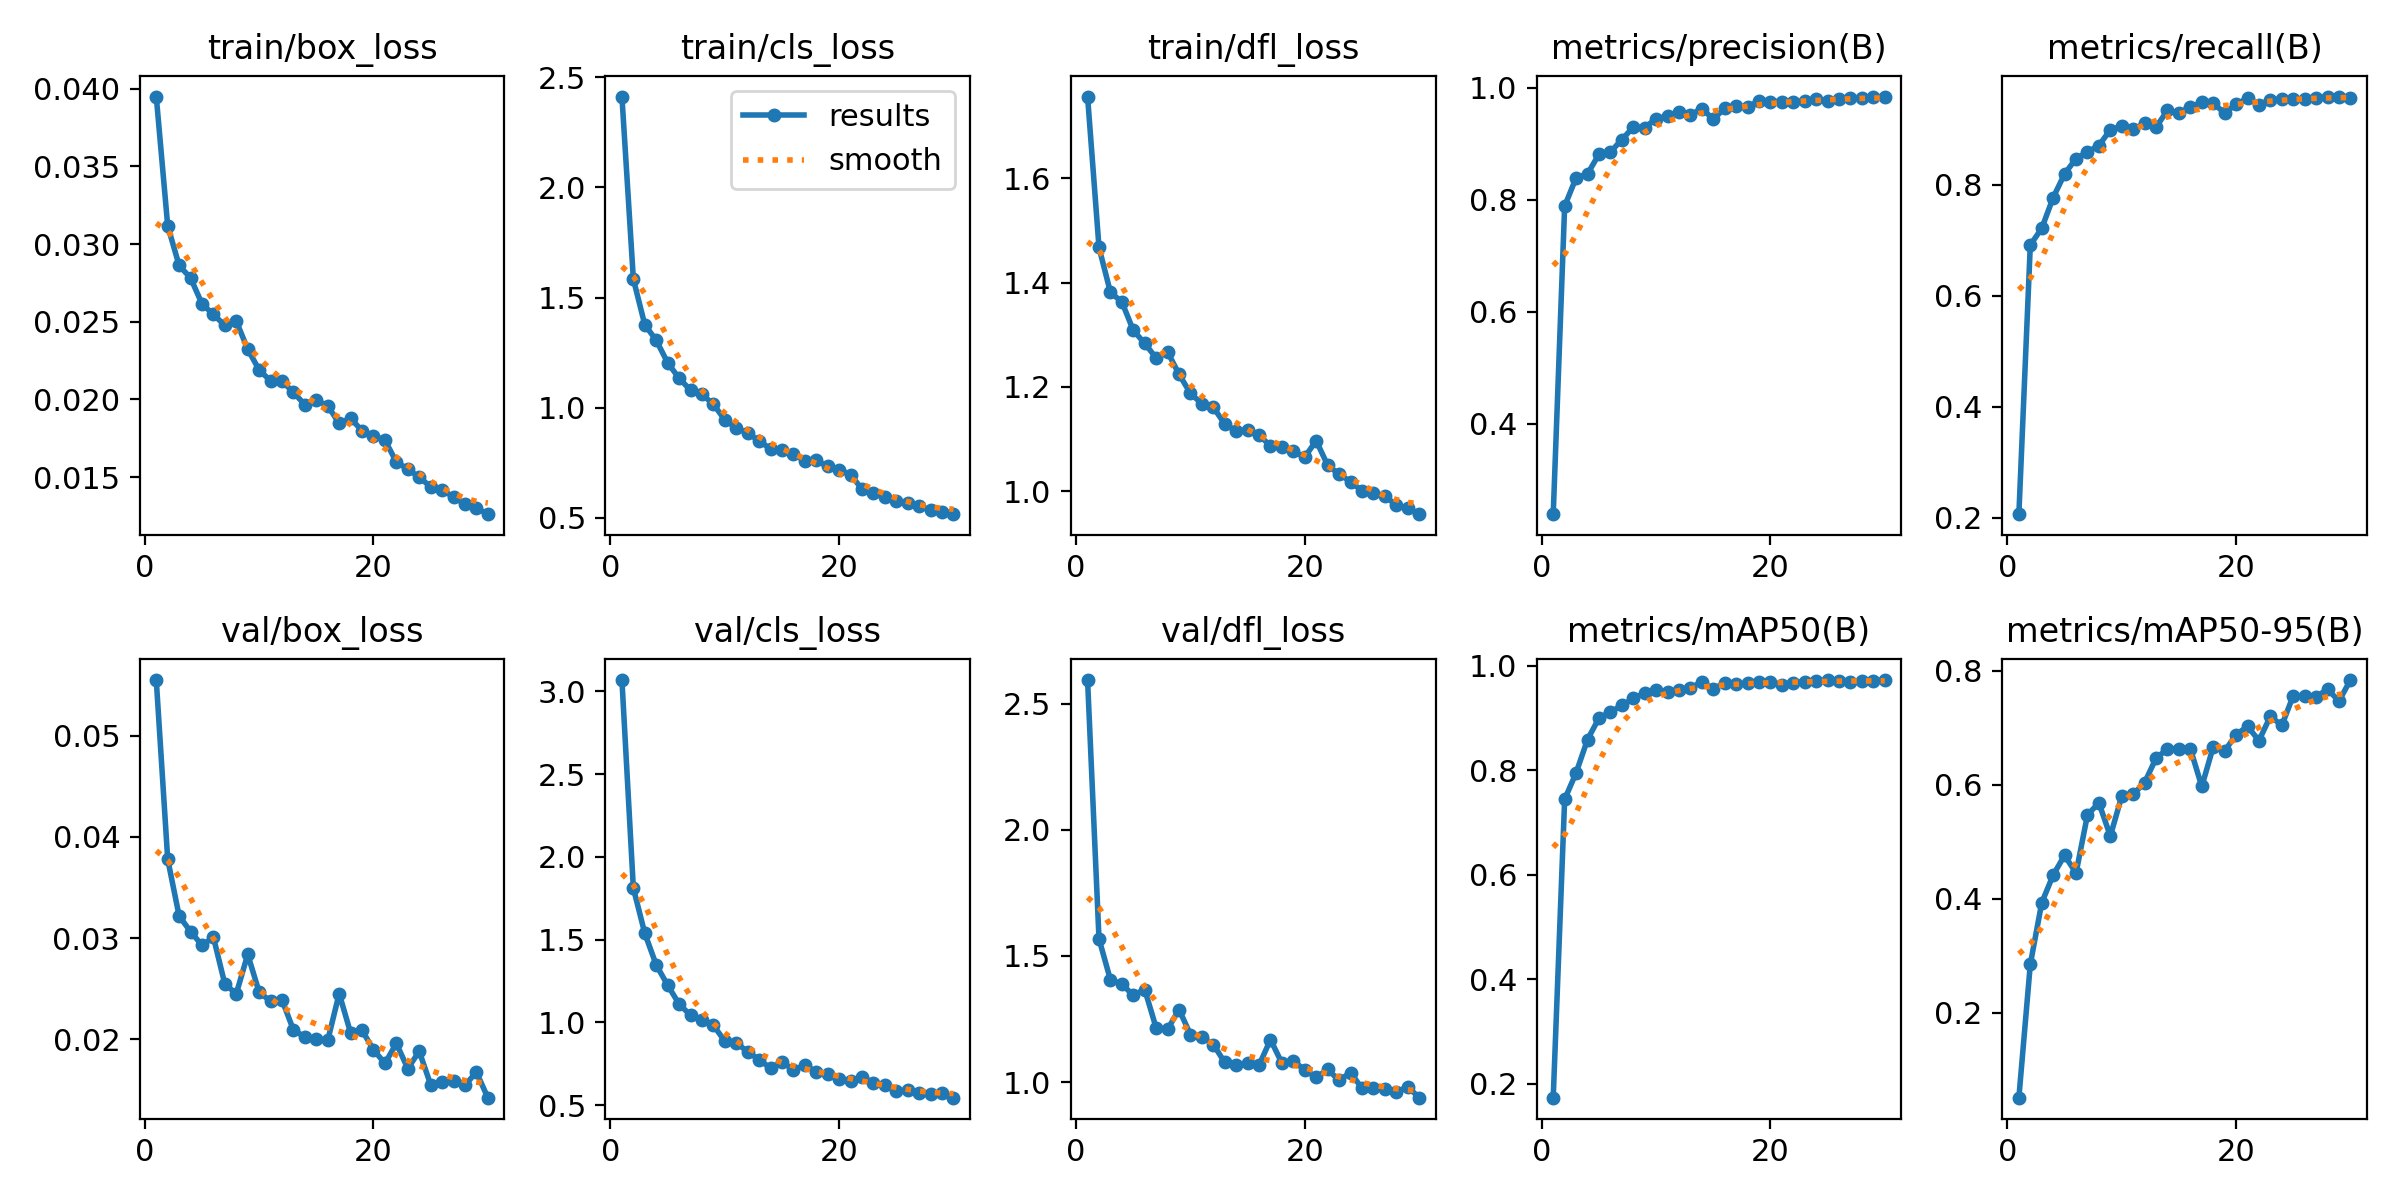

In [ ]:
Image(filename='/content/drive/MyDrive/Human_Detection/Dataset 02/runs/detect/train2/results.png', width=600)

In [ ]:
import pandas as pd
results=pd.read_csv("/content/drive/MyDrive/Human_Detection/Dataset 02/runs/detect/train3/results.csv")

In [6]:
results.max()

                  epoch    30.000000
         train/box_loss     0.039490
         train/cls_loss     2.413000
         train/dfl_loss     1.756900
   metrics/precision(B)     0.984320
      metrics/recall(B)     0.959400
       metrics/mAP50(B)     0.972970
    metrics/mAP50-95(B)     0.783820
           val/box_loss     0.055490
           val/cls_loss     3.067600
           val/dfl_loss     2.594200
                 lr/pg0     0.001858
                 lr/pg1     0.001858
                 lr/pg2     0.001858
dtype: float64

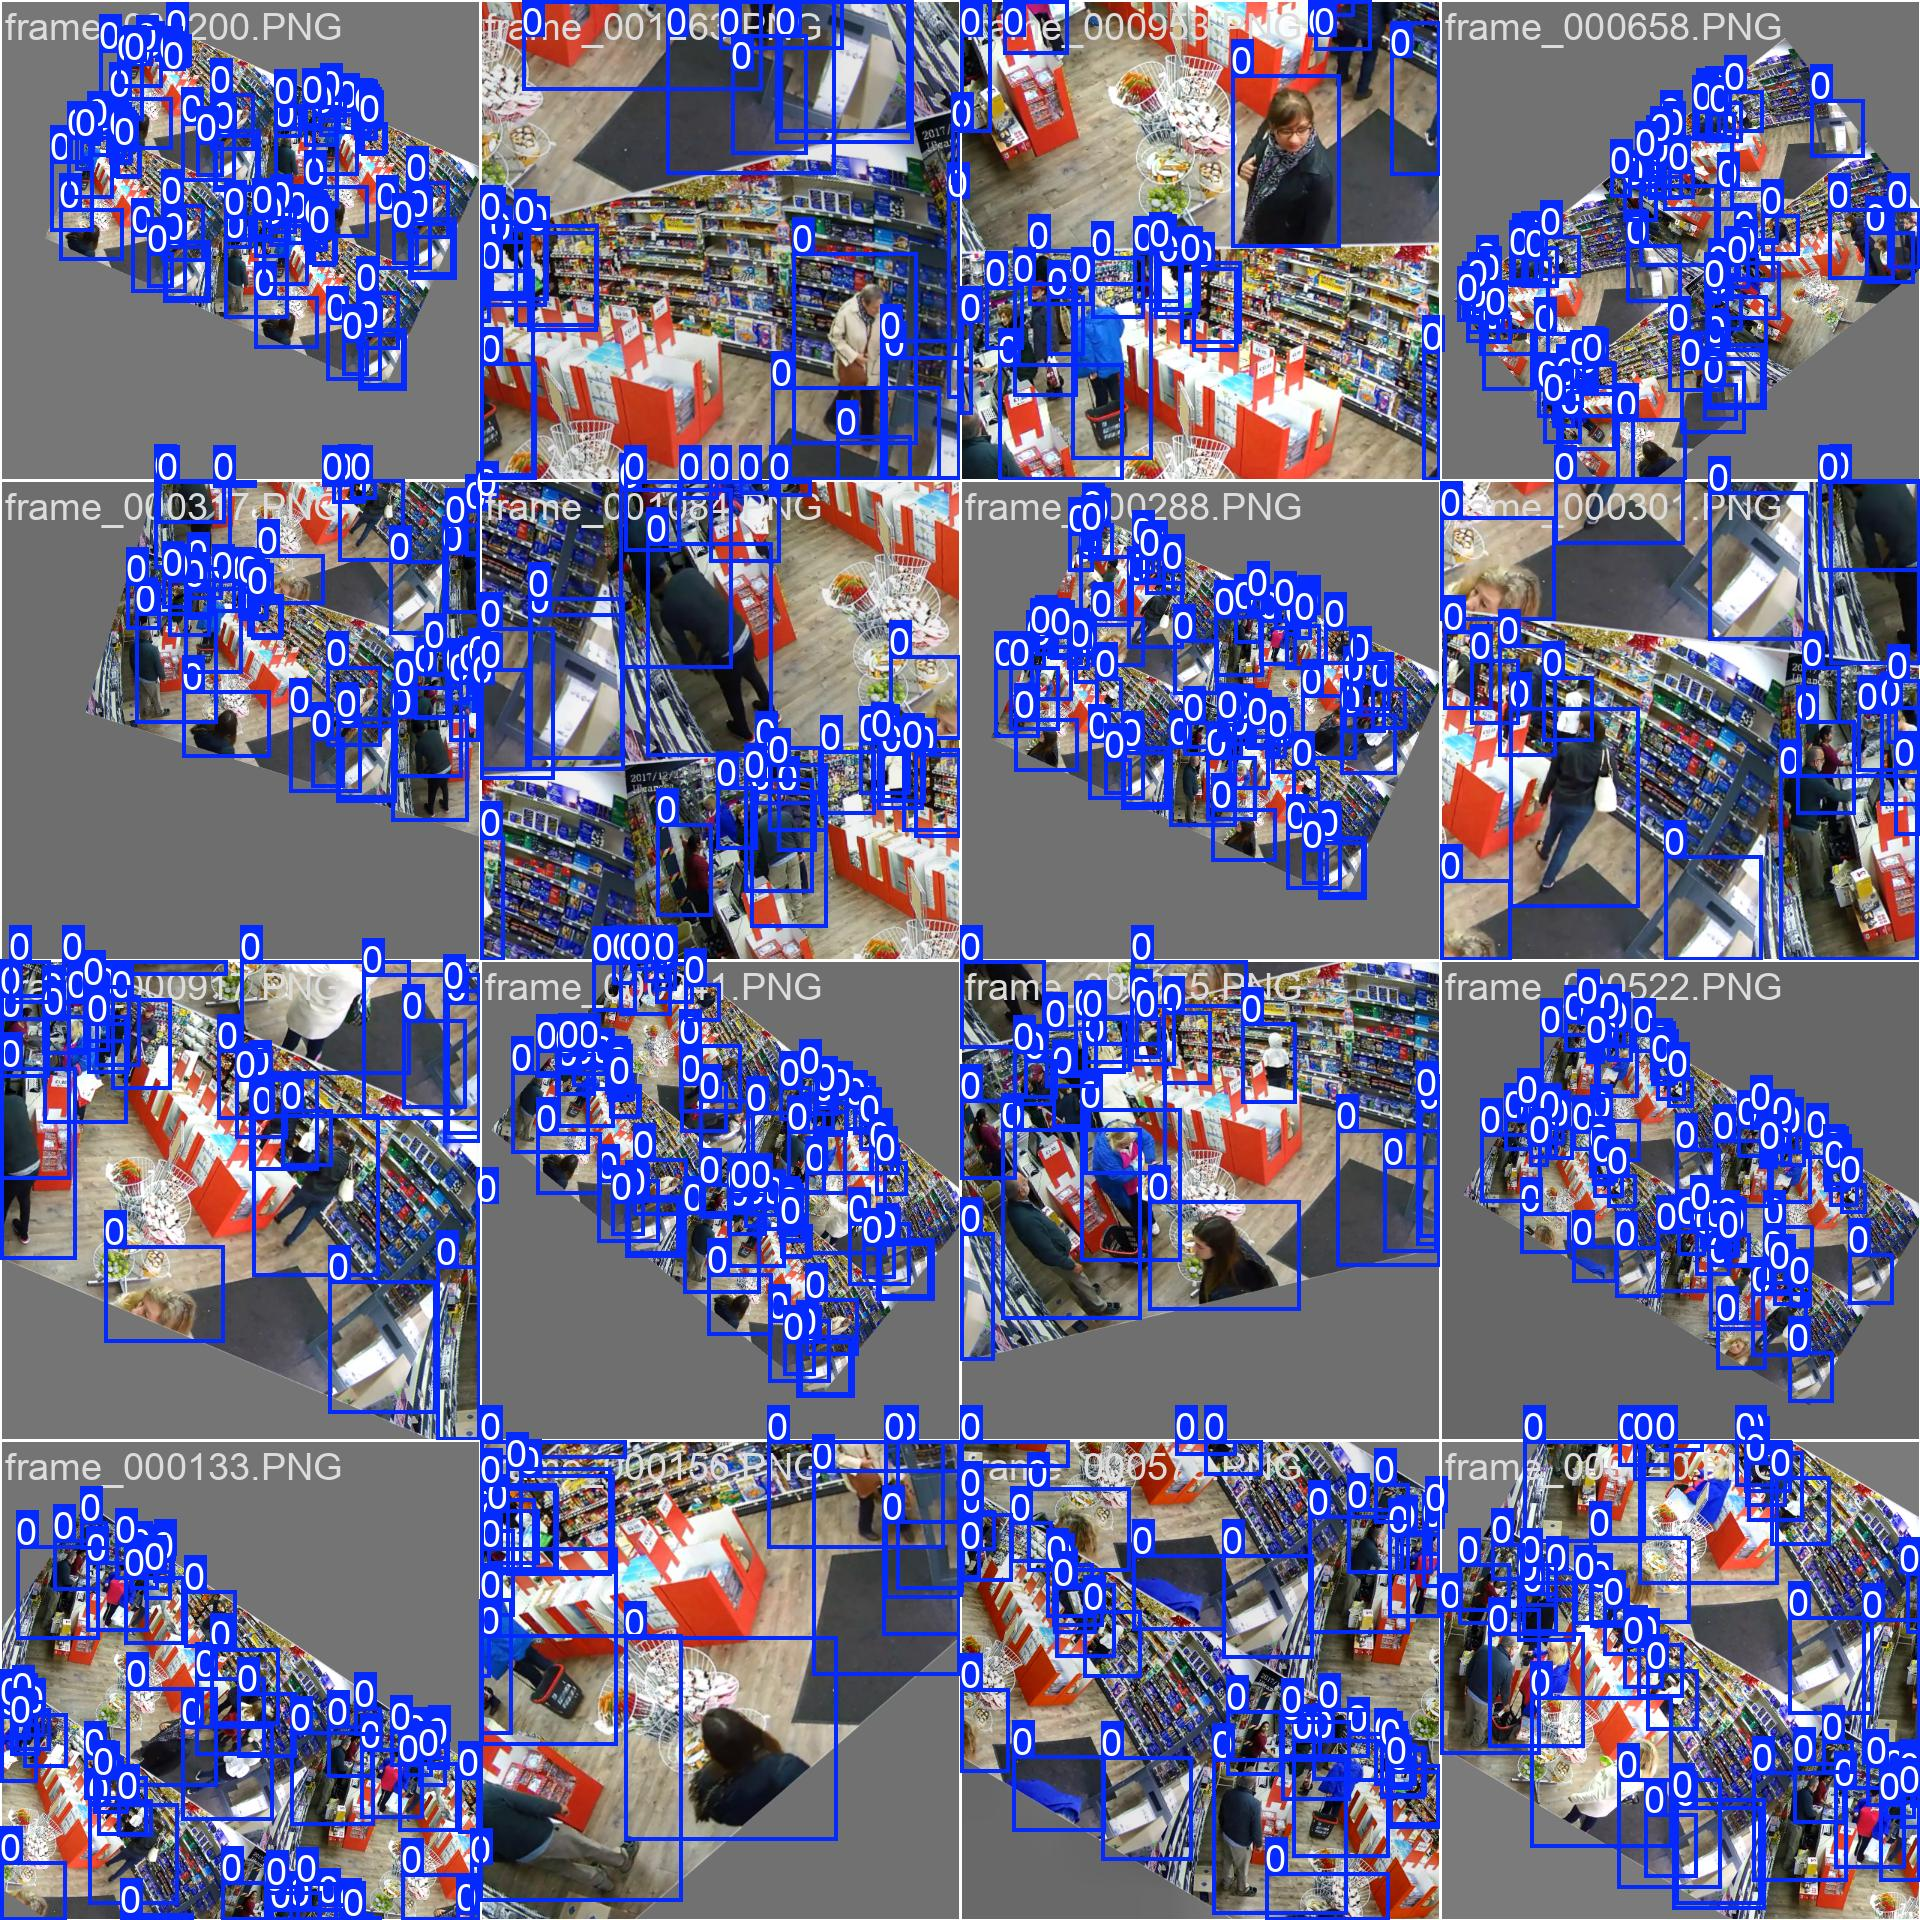

In [ ]:
Image(filename='/content/drive/MyDrive/Human_Detection/Dataset 02/runs/detect/train2/train_batch0.jpg', width=600)

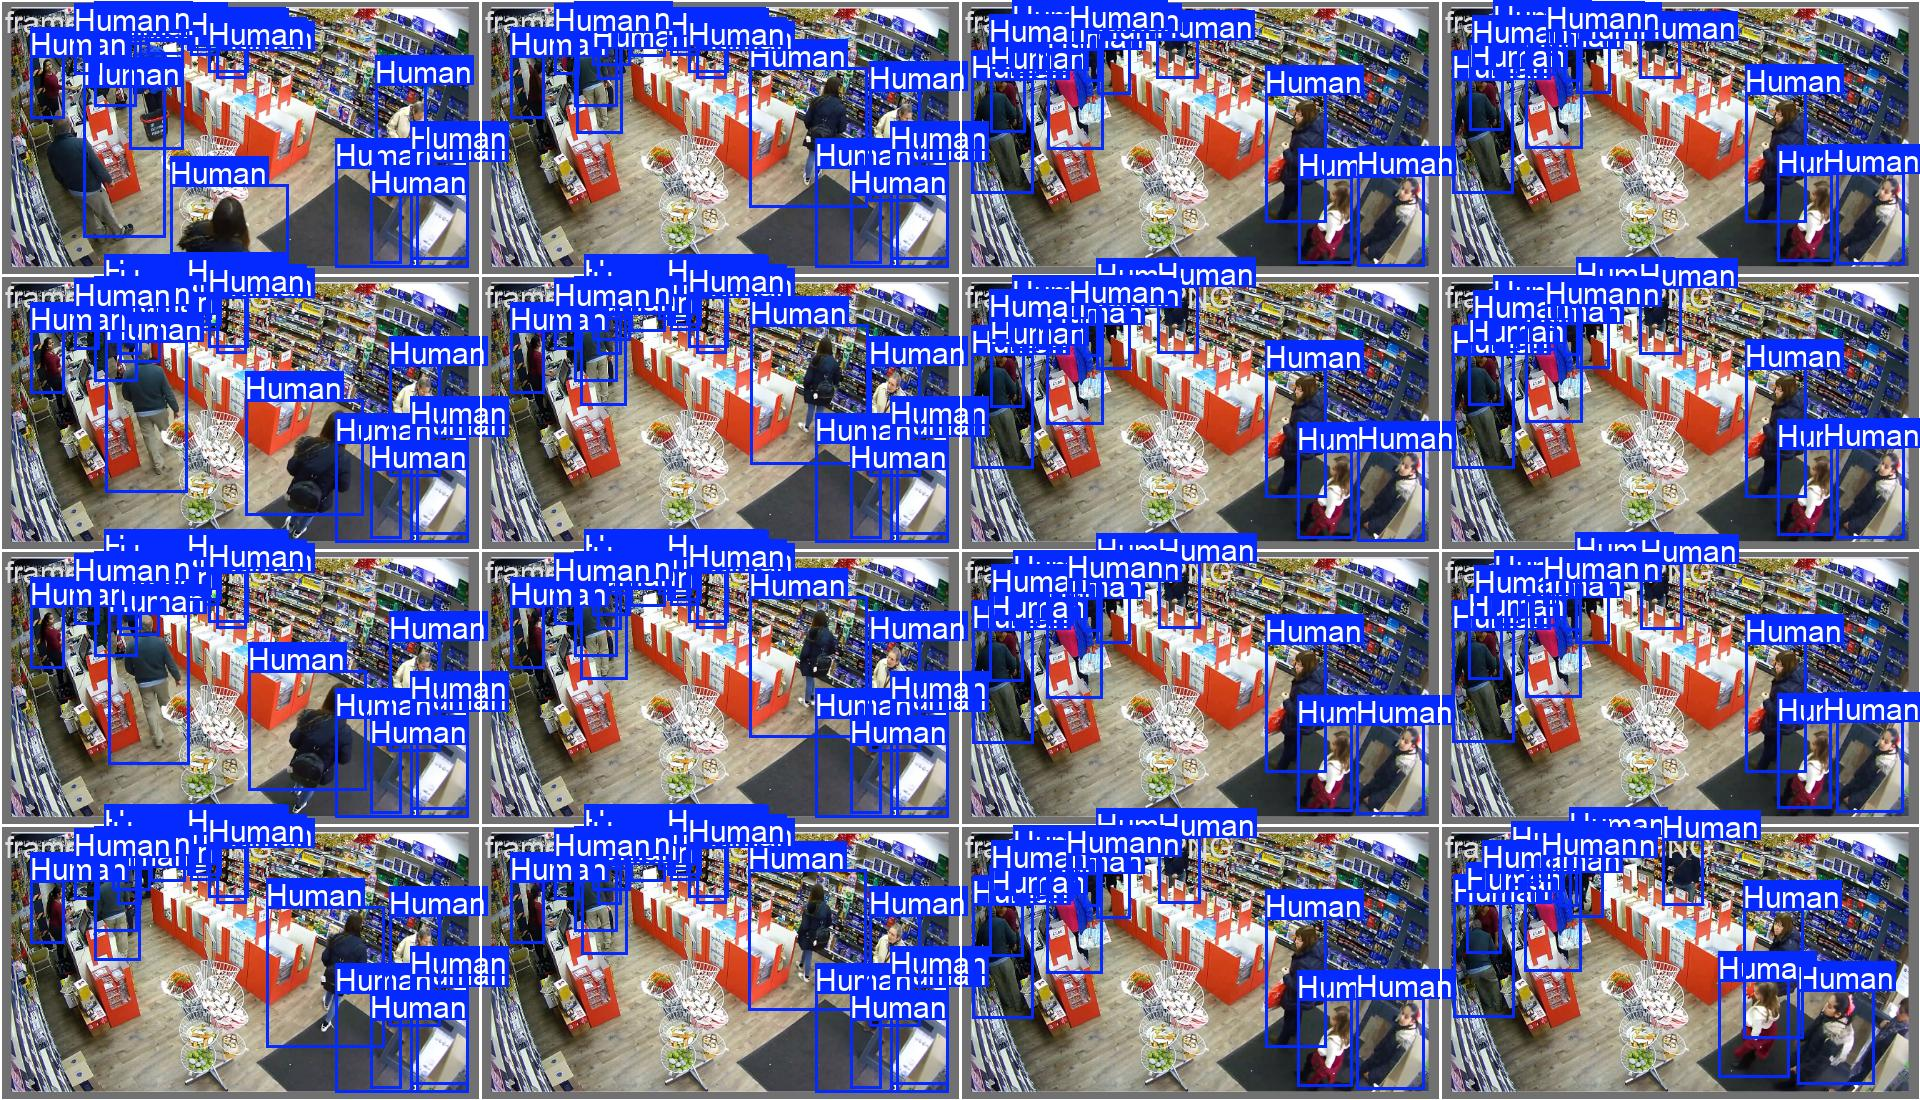

In [ ]:
Image(filename='/content/drive/MyDrive/Human_Detection/Dataset 02/runs/detect/train/val_batch0_labels.jpg', width=1080)